<a href="https://colab.research.google.com/github/DiegoSReco/CasualInference_New/blob/main/DAG_401.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

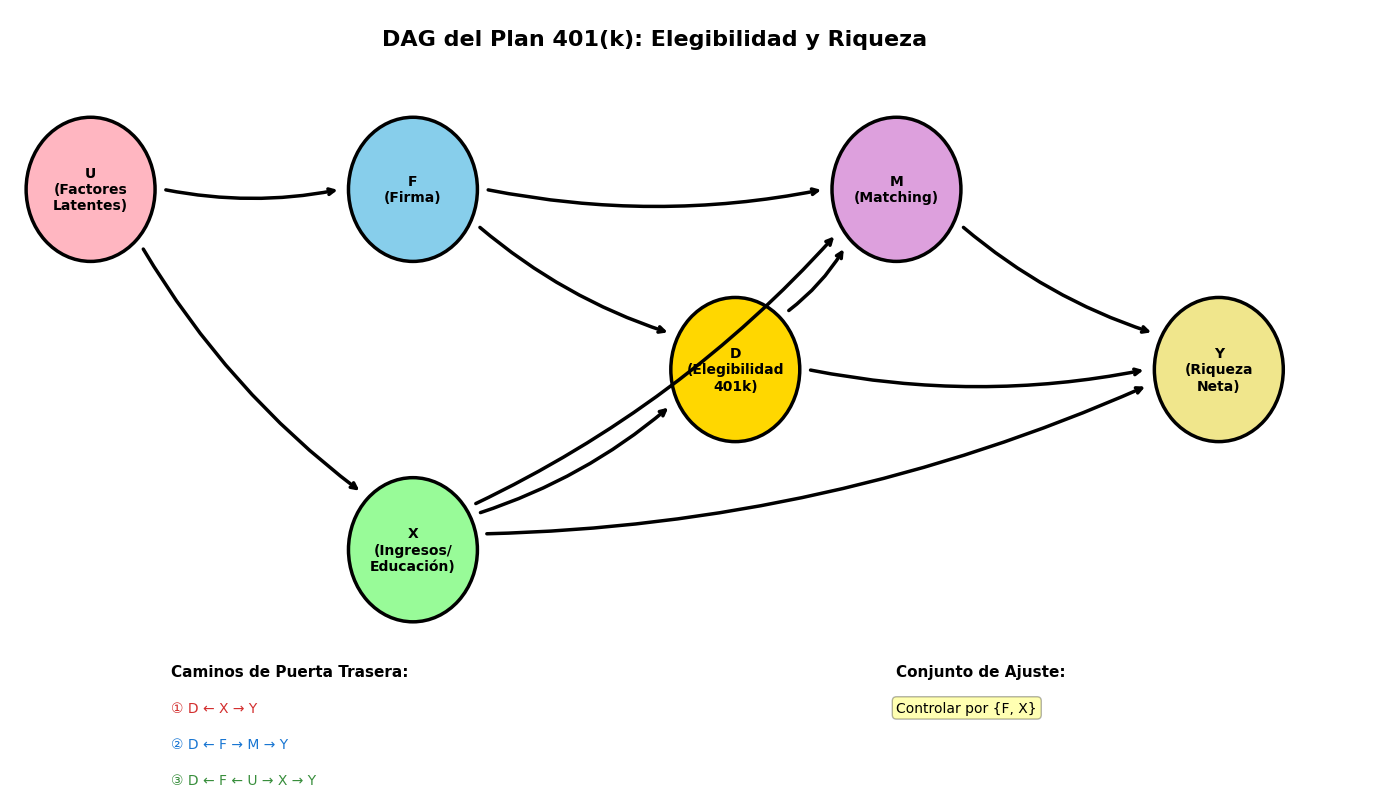

✅ DAG guardado como 'dag_401k.png'


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Crear el grafo dirigido
G = nx.DiGraph()

# Definir nodos
nodes = {
    'U': {'pos': (0, 4), 'color': '#FFB6C1', 'label': 'U\n(Factores\nLatentes)'},
    'F': {'pos': (2, 4), 'color': '#87CEEB', 'label': 'F\n(Firma)'},
    'X': {'pos': (2, 2), 'color': '#98FB98', 'label': 'X\n(Ingresos/\nEducación)'},
    'D': {'pos': (4, 3), 'color': '#FFD700', 'label': 'D\n(Elegibilidad\n401k)'},
    'M': {'pos': (5, 4), 'color': '#DDA0DD', 'label': 'M\n(Matching)'},
    'Y': {'pos': (7, 3), 'color': '#F0E68C', 'label': 'Y\n(Riqueza\nNeta)'}
}

# Agregar nodos al grafo
for node, attrs in nodes.items():
    G.add_node(node, pos=attrs['pos'])

# Definir aristas (relaciones causales)
edges = [
    ('U', 'F'),   # Factores latentes → Firma
    ('U', 'X'),   # Factores latentes → Características trabajador
    ('F', 'D'),   # Firma → Elegibilidad
    ('F', 'M'),   # Firma → Matching
    ('X', 'D'),   # Características → Elegibilidad
    ('X', 'Y'),   # Características → Riqueza
    ('X', 'M'),   # Características → Riqueza
    ('D', 'M'),   # Elegibilidad → Matching
    ('M', 'Y'),   # Matching → Riqueza
    ('D', 'Y')    # Elegibilidad → Riqueza (efecto directo)
]

G.add_edges_from(edges)

# Crear la figura
fig, ax = plt.subplots(figsize=(14, 8))
ax.set_xlim(-0.5, 8)
ax.set_ylim(1, 5)
ax.axis('off')

# Obtener posiciones
pos = {node: attrs['pos'] for node, attrs in nodes.items()}

# Dibujar nodos
for node, attrs in nodes.items():
    x, y = attrs['pos']
    circle = plt.Circle((x, y), 0.4, color=attrs['color'],
                        ec='black', linewidth=2.5, zorder=3)
    ax.add_patch(circle)
    ax.text(x, y, attrs['label'], ha='center', va='center',
            fontsize=10, fontweight='bold', zorder=4)

# Dibujar aristas con flechas
for edge in edges:
    start_node, end_node = edge
    x1, y1 = pos[start_node]
    x2, y2 = pos[end_node]

    # Calcular el ángulo y acortar la flecha para que no entre en los círculos
    dx = x2 - x1
    dy = y2 - y1
    length = np.sqrt(dx**2 + dy**2)

    # Reducir longitud para que termine en el borde del círculo
    offset = 0.45
    x1_adj = x1 + (dx / length) * offset
    y1_adj = y1 + (dy / length) * offset
    x2_adj = x2 - (dx / length) * offset
    y2_adj = y2 - (dy / length) * offset

    ax.annotate('', xy=(x2_adj, y2_adj), xytext=(x1_adj, y1_adj),
                arrowprops=dict(arrowstyle='->', lw=2.5, color='black',
                              connectionstyle="arc3,rad=0.1"))

# Agregar título
ax.text(3.5, 4.8, 'DAG del Plan 401(k): Elegibilidad y Riqueza',
        fontsize=16, fontweight='bold', ha='center')

# Agregar leyenda de caminos de puerta trasera
legend_y = 1.3
ax.text(0.5, legend_y, 'Caminos de Puerta Trasera:',
        fontsize=11, fontweight='bold')
ax.text(0.5, legend_y - 0.2, '① D ← X → Y', fontsize=10, color='#D32F2F')
ax.text(0.5, legend_y - 0.4, '② D ← F → M → Y', fontsize=10, color='#1976D2')
ax.text(0.5, legend_y - 0.6, '③ D ← F ← U → X → Y', fontsize=10, color='#388E3C')

ax.text(5, legend_y, 'Conjunto de Ajuste:', fontsize=11, fontweight='bold')
ax.text(5, legend_y - 0.2, 'Controlar por {F, X}', fontsize=10,
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.savefig('dag_401k.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ DAG guardado como 'dag_401k.png'")

